# MODEL BULIDING, TRAINING AND EVALUATION 
### The Data used here EX-cluded the `content` variable

### TL;DR
- **This note book retrieves the previously cleaned and saved data**
- **Vectorises (n-gram + sklearn implementation of tfidf vectorization) the text column and concatenates it back with the other columns using the vectorize_data function** 
- - **Trains an MLP classifer and a logic-regression model on each of the two sets**
- **Trained models were tested on the 15% test data set aside**

**I used the tensorflow frame work to bulid and train a the two layer MLP that predicts the sector of a job advertisement . As a reminder, I had trimmed the job sector categories from 30 to 12 to avoid skewness from class inbalance. Therefore the models have only 12 output units. See the OOP implementation of model composition and training logic in `model.py`.**

In [7]:
# suspend all notebook warnings
import warnings
import sys
warnings.filterwarnings('ignore')
sys.path.append('../src/')

# module auto reload
%load_ext autoreload
%autoreload 2

import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
sns.set_theme()

#custom module import
from helper import data_prep_pipeline, check_missing_distribution 
from helper import plot_conf_matrix, plot_metrics
from constants import *
from models import *
from vectorizer import vectorize_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Feature generation - Vectorization & concatenation 

# Training

In [8]:
# Tuned hyper parameters
learning_rate = 1e-5
epochs = 1000
batch_size = 128
layers = 2
units = 64
dropout_rate = 0.5

opt = tf.keras.optimizers.Adam(lr=learning_rate)
metrics = ['accuracy']
loss_fn = 'sparse_categorical_crossentropy'

# for early stoping
callbacks = callbacks_(patience=5)

## Training and Evaluating MLP Model

In [9]:
train_path = '../data/processed/train_df_excludes_content'
val_path = '../data/processed/val_df_excludes_content'
test_path = '../data/processed/test_df_excludes_content'

# feature generation - vectorization & concatenation
vectors = vectorize_data(train_path, val_path, test_path)

final_train_vector, train_labels = vectors[0], vectors[3]
final_val_vector, val_labels = vectors[1], vectors[4]
final_test_vector, test_labels = vectors[2], vectors[5]

input_shape = final_train_vector.shape[1:]
num_classes= len(np.unique((train_labels)))

# model object
mlp = MLP(layers, units, dropout_rate, input_shape, num_classes)

# build and compile a model instance
model_mlp = mlp.get_compiled_model(opt, metrics, loss_fn)

# train the model
history = mlp.train(model_mlp, 
           final_train_vector, 
           final_val_vector, 
           train_labels, 
           val_labels, 
           callbacks, 
           batch_size, 
           epochs,
          )

Epoch 1/1000
200/200 - 11s - loss: 2.4861 - accuracy: 0.0836 - val_loss: 2.4827 - val_accuracy: 0.0888 - 11s/epoch - 53ms/step
Epoch 2/1000
200/200 - 6s - loss: 2.4816 - accuracy: 0.0980 - val_loss: 2.4782 - val_accuracy: 0.1239 - 6s/epoch - 31ms/step
Epoch 3/1000
200/200 - 6s - loss: 2.4768 - accuracy: 0.1175 - val_loss: 2.4736 - val_accuracy: 0.1776 - 6s/epoch - 29ms/step
Epoch 4/1000
200/200 - 6s - loss: 2.4721 - accuracy: 0.1373 - val_loss: 2.4688 - val_accuracy: 0.2281 - 6s/epoch - 29ms/step
Epoch 5/1000
200/200 - 6s - loss: 2.4673 - accuracy: 0.1579 - val_loss: 2.4636 - val_accuracy: 0.2539 - 6s/epoch - 31ms/step
Epoch 6/1000
200/200 - 6s - loss: 2.4621 - accuracy: 0.1793 - val_loss: 2.4580 - val_accuracy: 0.2662 - 6s/epoch - 30ms/step
Epoch 7/1000
200/200 - 6s - loss: 2.4564 - accuracy: 0.1911 - val_loss: 2.4520 - val_accuracy: 0.2717 - 6s/epoch - 31ms/step
Epoch 8/1000
200/200 - 7s - loss: 2.4507 - accuracy: 0.2040 - val_loss: 2.4456 - val_accuracy: 0.2717 - 7s/epoch - 34ms/ste

200/200 - 6s - loss: 2.1059 - accuracy: 0.3753 - val_loss: 2.0810 - val_accuracy: 0.4055 - 6s/epoch - 29ms/step
Epoch 67/1000
200/200 - 6s - loss: 2.0970 - accuracy: 0.3826 - val_loss: 2.0750 - val_accuracy: 0.4075 - 6s/epoch - 28ms/step
Epoch 68/1000
200/200 - 6s - loss: 2.0934 - accuracy: 0.3809 - val_loss: 2.0690 - val_accuracy: 0.4118 - 6s/epoch - 29ms/step
Epoch 69/1000
200/200 - 6s - loss: 2.0892 - accuracy: 0.3860 - val_loss: 2.0631 - val_accuracy: 0.4149 - 6s/epoch - 29ms/step
Epoch 70/1000
200/200 - 6s - loss: 2.0852 - accuracy: 0.3892 - val_loss: 2.0571 - val_accuracy: 0.4172 - 6s/epoch - 29ms/step
Epoch 71/1000
200/200 - 6s - loss: 2.0761 - accuracy: 0.3914 - val_loss: 2.0511 - val_accuracy: 0.4193 - 6s/epoch - 30ms/step
Epoch 72/1000
200/200 - 6s - loss: 2.0724 - accuracy: 0.3901 - val_loss: 2.0452 - val_accuracy: 0.4209 - 6s/epoch - 29ms/step
Epoch 73/1000
200/200 - 6s - loss: 2.0662 - accuracy: 0.3962 - val_loss: 2.0392 - val_accuracy: 0.4240 - 6s/epoch - 29ms/step
Epoch 

Epoch 131/1000
200/200 - 6s - loss: 1.7547 - accuracy: 0.5245 - val_loss: 1.7007 - val_accuracy: 0.5842 - 6s/epoch - 29ms/step
Epoch 132/1000
200/200 - 6s - loss: 1.7476 - accuracy: 0.5297 - val_loss: 1.6952 - val_accuracy: 0.5870 - 6s/epoch - 30ms/step
Epoch 133/1000
200/200 - 6s - loss: 1.7437 - accuracy: 0.5287 - val_loss: 1.6896 - val_accuracy: 0.5888 - 6s/epoch - 29ms/step
Epoch 134/1000
200/200 - 6s - loss: 1.7370 - accuracy: 0.5332 - val_loss: 1.6840 - val_accuracy: 0.5912 - 6s/epoch - 28ms/step
Epoch 135/1000
200/200 - 6s - loss: 1.7293 - accuracy: 0.5349 - val_loss: 1.6785 - val_accuracy: 0.5937 - 6s/epoch - 29ms/step
Epoch 136/1000
200/200 - 6s - loss: 1.7276 - accuracy: 0.5378 - val_loss: 1.6730 - val_accuracy: 0.5961 - 6s/epoch - 29ms/step
Epoch 137/1000
200/200 - 6s - loss: 1.7206 - accuracy: 0.5426 - val_loss: 1.6675 - val_accuracy: 0.5994 - 6s/epoch - 29ms/step
Epoch 138/1000
200/200 - 6s - loss: 1.7145 - accuracy: 0.5413 - val_loss: 1.6620 - val_accuracy: 0.6012 - 6s/ep

Epoch 196/1000
200/200 - 6s - loss: 1.4548 - accuracy: 0.6229 - val_loss: 1.3770 - val_accuracy: 0.6970 - 6s/epoch - 29ms/step
Epoch 197/1000
200/200 - 6s - loss: 1.4568 - accuracy: 0.6241 - val_loss: 1.3728 - val_accuracy: 0.6977 - 6s/epoch - 28ms/step
Epoch 198/1000
200/200 - 6s - loss: 1.4496 - accuracy: 0.6227 - val_loss: 1.3685 - val_accuracy: 0.6988 - 6s/epoch - 29ms/step
Epoch 199/1000
200/200 - 6s - loss: 1.4391 - accuracy: 0.6263 - val_loss: 1.3642 - val_accuracy: 0.7001 - 6s/epoch - 29ms/step
Epoch 200/1000
200/200 - 6s - loss: 1.4400 - accuracy: 0.6279 - val_loss: 1.3599 - val_accuracy: 0.7012 - 6s/epoch - 28ms/step
Epoch 201/1000
200/200 - 6s - loss: 1.4380 - accuracy: 0.6257 - val_loss: 1.3557 - val_accuracy: 0.7021 - 6s/epoch - 28ms/step
Epoch 202/1000
200/200 - 6s - loss: 1.4258 - accuracy: 0.6352 - val_loss: 1.3514 - val_accuracy: 0.7041 - 6s/epoch - 29ms/step
Epoch 203/1000
200/200 - 6s - loss: 1.4325 - accuracy: 0.6280 - val_loss: 1.3473 - val_accuracy: 0.7060 - 6s/ep

Epoch 261/1000
200/200 - 6s - loss: 1.2380 - accuracy: 0.6778 - val_loss: 1.1427 - val_accuracy: 0.7442 - 6s/epoch - 30ms/step
Epoch 262/1000
200/200 - 6s - loss: 1.2364 - accuracy: 0.6788 - val_loss: 1.1398 - val_accuracy: 0.7450 - 6s/epoch - 31ms/step
Epoch 263/1000
200/200 - 6s - loss: 1.2381 - accuracy: 0.6801 - val_loss: 1.1370 - val_accuracy: 0.7457 - 6s/epoch - 30ms/step
Epoch 264/1000
200/200 - 6s - loss: 1.2288 - accuracy: 0.6825 - val_loss: 1.1341 - val_accuracy: 0.7453 - 6s/epoch - 29ms/step
Epoch 265/1000
200/200 - 6s - loss: 1.2252 - accuracy: 0.6817 - val_loss: 1.1311 - val_accuracy: 0.7455 - 6s/epoch - 30ms/step
Epoch 266/1000
200/200 - 6s - loss: 1.2242 - accuracy: 0.6837 - val_loss: 1.1283 - val_accuracy: 0.7462 - 6s/epoch - 30ms/step
Epoch 267/1000
200/200 - 6s - loss: 1.2209 - accuracy: 0.6820 - val_loss: 1.1254 - val_accuracy: 0.7464 - 6s/epoch - 30ms/step
Epoch 268/1000
200/200 - 6s - loss: 1.2155 - accuracy: 0.6854 - val_loss: 1.1225 - val_accuracy: 0.7470 - 6s/ep

Epoch 326/1000
200/200 - 6s - loss: 1.0885 - accuracy: 0.7100 - val_loss: 0.9871 - val_accuracy: 0.7646 - 6s/epoch - 30ms/step
Epoch 327/1000
200/200 - 6s - loss: 1.0819 - accuracy: 0.7164 - val_loss: 0.9852 - val_accuracy: 0.7655 - 6s/epoch - 30ms/step
Epoch 328/1000
200/200 - 6s - loss: 1.0757 - accuracy: 0.7167 - val_loss: 0.9834 - val_accuracy: 0.7657 - 6s/epoch - 31ms/step
Epoch 329/1000
200/200 - 6s - loss: 1.0737 - accuracy: 0.7160 - val_loss: 0.9815 - val_accuracy: 0.7658 - 6s/epoch - 30ms/step
Epoch 330/1000
200/200 - 7s - loss: 1.0722 - accuracy: 0.7167 - val_loss: 0.9796 - val_accuracy: 0.7660 - 7s/epoch - 35ms/step
Epoch 331/1000
200/200 - 6s - loss: 1.0735 - accuracy: 0.7168 - val_loss: 0.9778 - val_accuracy: 0.7664 - 6s/epoch - 30ms/step
Epoch 332/1000
200/200 - 6s - loss: 1.0654 - accuracy: 0.7197 - val_loss: 0.9759 - val_accuracy: 0.7671 - 6s/epoch - 30ms/step
Epoch 333/1000
200/200 - 6s - loss: 1.0707 - accuracy: 0.7156 - val_loss: 0.9740 - val_accuracy: 0.7675 - 6s/ep

Epoch 391/1000
200/200 - 6s - loss: 0.9731 - accuracy: 0.7409 - val_loss: 0.8862 - val_accuracy: 0.7765 - 6s/epoch - 30ms/step
Epoch 392/1000
200/200 - 6s - loss: 0.9784 - accuracy: 0.7360 - val_loss: 0.8850 - val_accuracy: 0.7766 - 6s/epoch - 29ms/step
Epoch 393/1000
200/200 - 6s - loss: 0.9755 - accuracy: 0.7392 - val_loss: 0.8837 - val_accuracy: 0.7774 - 6s/epoch - 29ms/step
Epoch 394/1000
200/200 - 6s - loss: 0.9750 - accuracy: 0.7364 - val_loss: 0.8824 - val_accuracy: 0.7776 - 6s/epoch - 29ms/step
Epoch 395/1000
200/200 - 6s - loss: 0.9678 - accuracy: 0.7402 - val_loss: 0.8812 - val_accuracy: 0.7776 - 6s/epoch - 30ms/step
Epoch 396/1000
200/200 - 6s - loss: 0.9672 - accuracy: 0.7389 - val_loss: 0.8799 - val_accuracy: 0.7777 - 6s/epoch - 30ms/step
Epoch 397/1000
200/200 - 6s - loss: 0.9624 - accuracy: 0.7401 - val_loss: 0.8788 - val_accuracy: 0.7776 - 6s/epoch - 30ms/step
Epoch 398/1000
200/200 - 6s - loss: 0.9639 - accuracy: 0.7444 - val_loss: 0.8776 - val_accuracy: 0.7781 - 6s/ep

Epoch 456/1000
200/200 - 6s - loss: 0.8901 - accuracy: 0.7594 - val_loss: 0.8195 - val_accuracy: 0.7832 - 6s/epoch - 29ms/step
Epoch 457/1000
200/200 - 6s - loss: 0.8933 - accuracy: 0.7590 - val_loss: 0.8186 - val_accuracy: 0.7832 - 6s/epoch - 29ms/step
Epoch 458/1000
200/200 - 6s - loss: 0.8940 - accuracy: 0.7547 - val_loss: 0.8179 - val_accuracy: 0.7834 - 6s/epoch - 29ms/step
Epoch 459/1000
200/200 - 6s - loss: 0.8964 - accuracy: 0.7560 - val_loss: 0.8171 - val_accuracy: 0.7838 - 6s/epoch - 30ms/step
Epoch 460/1000
200/200 - 6s - loss: 0.8915 - accuracy: 0.7544 - val_loss: 0.8163 - val_accuracy: 0.7841 - 6s/epoch - 30ms/step
Epoch 461/1000
200/200 - 6s - loss: 0.8965 - accuracy: 0.7516 - val_loss: 0.8155 - val_accuracy: 0.7841 - 6s/epoch - 30ms/step
Epoch 462/1000
200/200 - 6s - loss: 0.8944 - accuracy: 0.7543 - val_loss: 0.8147 - val_accuracy: 0.7841 - 6s/epoch - 30ms/step
Epoch 463/1000
200/200 - 6s - loss: 0.8870 - accuracy: 0.7588 - val_loss: 0.8139 - val_accuracy: 0.7843 - 6s/ep

Epoch 521/1000
200/200 - 6s - loss: 0.8351 - accuracy: 0.7683 - val_loss: 0.7744 - val_accuracy: 0.7893 - 6s/epoch - 29ms/step
Epoch 522/1000
200/200 - 6s - loss: 0.8296 - accuracy: 0.7720 - val_loss: 0.7738 - val_accuracy: 0.7896 - 6s/epoch - 29ms/step
Epoch 523/1000
200/200 - 6s - loss: 0.8274 - accuracy: 0.7722 - val_loss: 0.7732 - val_accuracy: 0.7895 - 6s/epoch - 30ms/step
Epoch 524/1000
200/200 - 6s - loss: 0.8275 - accuracy: 0.7720 - val_loss: 0.7726 - val_accuracy: 0.7895 - 6s/epoch - 30ms/step
Epoch 525/1000
200/200 - 6s - loss: 0.8366 - accuracy: 0.7682 - val_loss: 0.7722 - val_accuracy: 0.7895 - 6s/epoch - 31ms/step
Epoch 526/1000
200/200 - 6s - loss: 0.8336 - accuracy: 0.7674 - val_loss: 0.7717 - val_accuracy: 0.7893 - 6s/epoch - 30ms/step
Epoch 527/1000
200/200 - 6s - loss: 0.8299 - accuracy: 0.7679 - val_loss: 0.7711 - val_accuracy: 0.7895 - 6s/epoch - 31ms/step
Epoch 528/1000
200/200 - 6s - loss: 0.8325 - accuracy: 0.7662 - val_loss: 0.7706 - val_accuracy: 0.7893 - 6s/ep

Epoch 586/1000
200/200 - 6s - loss: 0.7876 - accuracy: 0.7778 - val_loss: 0.7428 - val_accuracy: 0.7920 - 6s/epoch - 30ms/step
Epoch 587/1000
200/200 - 6s - loss: 0.7788 - accuracy: 0.7809 - val_loss: 0.7424 - val_accuracy: 0.7917 - 6s/epoch - 29ms/step
Epoch 588/1000
200/200 - 6s - loss: 0.7798 - accuracy: 0.7798 - val_loss: 0.7419 - val_accuracy: 0.7917 - 6s/epoch - 30ms/step
Epoch 589/1000
200/200 - 6s - loss: 0.7826 - accuracy: 0.7816 - val_loss: 0.7415 - val_accuracy: 0.7917 - 6s/epoch - 30ms/step
Epoch 590/1000
200/200 - 6s - loss: 0.7831 - accuracy: 0.7795 - val_loss: 0.7411 - val_accuracy: 0.7920 - 6s/epoch - 30ms/step
Epoch 591/1000
200/200 - 6s - loss: 0.7847 - accuracy: 0.7774 - val_loss: 0.7407 - val_accuracy: 0.7920 - 6s/epoch - 30ms/step
Epoch 592/1000
200/200 - 6s - loss: 0.7856 - accuracy: 0.7782 - val_loss: 0.7403 - val_accuracy: 0.7915 - 6s/epoch - 30ms/step
Epoch 593/1000
200/200 - 6s - loss: 0.7851 - accuracy: 0.7794 - val_loss: 0.7399 - val_accuracy: 0.7917 - 6s/ep

Epoch 651/1000
200/200 - 6s - loss: 0.7489 - accuracy: 0.7862 - val_loss: 0.7203 - val_accuracy: 0.7933 - 6s/epoch - 30ms/step
Epoch 652/1000
200/200 - 6s - loss: 0.7487 - accuracy: 0.7881 - val_loss: 0.7200 - val_accuracy: 0.7933 - 6s/epoch - 30ms/step
Epoch 653/1000
200/200 - 6s - loss: 0.7469 - accuracy: 0.7908 - val_loss: 0.7197 - val_accuracy: 0.7931 - 6s/epoch - 30ms/step
Epoch 654/1000
200/200 - 6s - loss: 0.7424 - accuracy: 0.7919 - val_loss: 0.7194 - val_accuracy: 0.7931 - 6s/epoch - 30ms/step
Epoch 655/1000
200/200 - 6s - loss: 0.7426 - accuracy: 0.7885 - val_loss: 0.7192 - val_accuracy: 0.7933 - 6s/epoch - 30ms/step
Epoch 656/1000
200/200 - 6s - loss: 0.7466 - accuracy: 0.7876 - val_loss: 0.7189 - val_accuracy: 0.7933 - 6s/epoch - 29ms/step
Epoch 657/1000
200/200 - 6s - loss: 0.7491 - accuracy: 0.7858 - val_loss: 0.7186 - val_accuracy: 0.7933 - 6s/epoch - 31ms/step
Epoch 658/1000
200/200 - 6s - loss: 0.7447 - accuracy: 0.7874 - val_loss: 0.7183 - val_accuracy: 0.7935 - 6s/ep

Epoch 716/1000
200/200 - 6s - loss: 0.7178 - accuracy: 0.7961 - val_loss: 0.7038 - val_accuracy: 0.7955 - 6s/epoch - 30ms/step
Epoch 717/1000
200/200 - 6s - loss: 0.7171 - accuracy: 0.7953 - val_loss: 0.7036 - val_accuracy: 0.7949 - 6s/epoch - 30ms/step
Epoch 718/1000
200/200 - 6s - loss: 0.7079 - accuracy: 0.8001 - val_loss: 0.7034 - val_accuracy: 0.7951 - 6s/epoch - 30ms/step
Epoch 719/1000
200/200 - 6s - loss: 0.7153 - accuracy: 0.7952 - val_loss: 0.7032 - val_accuracy: 0.7948 - 6s/epoch - 30ms/step
Epoch 720/1000
200/200 - 6s - loss: 0.7074 - accuracy: 0.7985 - val_loss: 0.7030 - val_accuracy: 0.7953 - 6s/epoch - 29ms/step
Epoch 721/1000
200/200 - 6s - loss: 0.7122 - accuracy: 0.7943 - val_loss: 0.7028 - val_accuracy: 0.7948 - 6s/epoch - 30ms/step
Epoch 722/1000
200/200 - 6s - loss: 0.7127 - accuracy: 0.7980 - val_loss: 0.7025 - val_accuracy: 0.7948 - 6s/epoch - 30ms/step
Epoch 723/1000
200/200 - 6s - loss: 0.7107 - accuracy: 0.7960 - val_loss: 0.7024 - val_accuracy: 0.7951 - 6s/ep

Epoch 781/1000
200/200 - 6s - loss: 0.6883 - accuracy: 0.8015 - val_loss: 0.6916 - val_accuracy: 0.7951 - 6s/epoch - 30ms/step
Epoch 782/1000
200/200 - 6s - loss: 0.6814 - accuracy: 0.8029 - val_loss: 0.6915 - val_accuracy: 0.7953 - 6s/epoch - 30ms/step
Epoch 783/1000
200/200 - 6s - loss: 0.6834 - accuracy: 0.8056 - val_loss: 0.6913 - val_accuracy: 0.7955 - 6s/epoch - 30ms/step
Epoch 784/1000
200/200 - 6s - loss: 0.6827 - accuracy: 0.8008 - val_loss: 0.6912 - val_accuracy: 0.7951 - 6s/epoch - 30ms/step
Epoch 785/1000
200/200 - 6s - loss: 0.6896 - accuracy: 0.8000 - val_loss: 0.6910 - val_accuracy: 0.7959 - 6s/epoch - 30ms/step
Epoch 786/1000
200/200 - 6s - loss: 0.6793 - accuracy: 0.8049 - val_loss: 0.6908 - val_accuracy: 0.7955 - 6s/epoch - 30ms/step
Epoch 787/1000
200/200 - 6s - loss: 0.6778 - accuracy: 0.8040 - val_loss: 0.6907 - val_accuracy: 0.7955 - 6s/epoch - 31ms/step
Epoch 788/1000
200/200 - 6s - loss: 0.6824 - accuracy: 0.8037 - val_loss: 0.6904 - val_accuracy: 0.7953 - 6s/ep

Epoch 846/1000
200/200 - 6s - loss: 0.6595 - accuracy: 0.8079 - val_loss: 0.6826 - val_accuracy: 0.7959 - 6s/epoch - 30ms/step
Epoch 847/1000
200/200 - 6s - loss: 0.6611 - accuracy: 0.8076 - val_loss: 0.6824 - val_accuracy: 0.7959 - 6s/epoch - 30ms/step
Epoch 848/1000
200/200 - 6s - loss: 0.6603 - accuracy: 0.8056 - val_loss: 0.6823 - val_accuracy: 0.7955 - 6s/epoch - 31ms/step
Epoch 849/1000
200/200 - 6s - loss: 0.6559 - accuracy: 0.8126 - val_loss: 0.6822 - val_accuracy: 0.7957 - 6s/epoch - 30ms/step
Epoch 850/1000
200/200 - 6s - loss: 0.6542 - accuracy: 0.8105 - val_loss: 0.6820 - val_accuracy: 0.7959 - 6s/epoch - 30ms/step
Epoch 851/1000
200/200 - 6s - loss: 0.6618 - accuracy: 0.8071 - val_loss: 0.6820 - val_accuracy: 0.7960 - 6s/epoch - 32ms/step
Epoch 852/1000
200/200 - 6s - loss: 0.6556 - accuracy: 0.8093 - val_loss: 0.6818 - val_accuracy: 0.7960 - 6s/epoch - 32ms/step
Epoch 853/1000
200/200 - 6s - loss: 0.6618 - accuracy: 0.8074 - val_loss: 0.6817 - val_accuracy: 0.7957 - 6s/ep

Epoch 911/1000
200/200 - 6s - loss: 0.6338 - accuracy: 0.8120 - val_loss: 0.6757 - val_accuracy: 0.7973 - 6s/epoch - 30ms/step
Epoch 912/1000
200/200 - 6s - loss: 0.6368 - accuracy: 0.8160 - val_loss: 0.6757 - val_accuracy: 0.7973 - 6s/epoch - 30ms/step
Epoch 913/1000
200/200 - 6s - loss: 0.6333 - accuracy: 0.8162 - val_loss: 0.6756 - val_accuracy: 0.7968 - 6s/epoch - 30ms/step
Epoch 914/1000
200/200 - 6s - loss: 0.6334 - accuracy: 0.8154 - val_loss: 0.6755 - val_accuracy: 0.7975 - 6s/epoch - 30ms/step
Epoch 915/1000
200/200 - 6s - loss: 0.6344 - accuracy: 0.8126 - val_loss: 0.6754 - val_accuracy: 0.7973 - 6s/epoch - 30ms/step
Epoch 916/1000
200/200 - 6s - loss: 0.6406 - accuracy: 0.8136 - val_loss: 0.6753 - val_accuracy: 0.7975 - 6s/epoch - 30ms/step
Epoch 917/1000
200/200 - 6s - loss: 0.6347 - accuracy: 0.8144 - val_loss: 0.6752 - val_accuracy: 0.7975 - 6s/epoch - 29ms/step
Epoch 918/1000
200/200 - 6s - loss: 0.6390 - accuracy: 0.8125 - val_loss: 0.6751 - val_accuracy: 0.7971 - 6s/ep

Epoch 976/1000
200/200 - 6s - loss: 0.6166 - accuracy: 0.8187 - val_loss: 0.6711 - val_accuracy: 0.7984 - 6s/epoch - 29ms/step
Epoch 977/1000
200/200 - 6s - loss: 0.6159 - accuracy: 0.8185 - val_loss: 0.6710 - val_accuracy: 0.7984 - 6s/epoch - 29ms/step
Epoch 978/1000
200/200 - 6s - loss: 0.6199 - accuracy: 0.8181 - val_loss: 0.6709 - val_accuracy: 0.7988 - 6s/epoch - 30ms/step
Epoch 979/1000
200/200 - 6s - loss: 0.6207 - accuracy: 0.8164 - val_loss: 0.6709 - val_accuracy: 0.7986 - 6s/epoch - 30ms/step
Epoch 980/1000
200/200 - 5s - loss: 0.6218 - accuracy: 0.8190 - val_loss: 0.6708 - val_accuracy: 0.7990 - 5s/epoch - 27ms/step
Epoch 981/1000
200/200 - 4s - loss: 0.6123 - accuracy: 0.8223 - val_loss: 0.6706 - val_accuracy: 0.7988 - 4s/epoch - 21ms/step
Epoch 982/1000
200/200 - 4s - loss: 0.6103 - accuracy: 0.8208 - val_loss: 0.6705 - val_accuracy: 0.7984 - 4s/epoch - 18ms/step
Epoch 983/1000
200/200 - 4s - loss: 0.6096 - accuracy: 0.8194 - val_loss: 0.6705 - val_accuracy: 0.7982 - 4s/ep

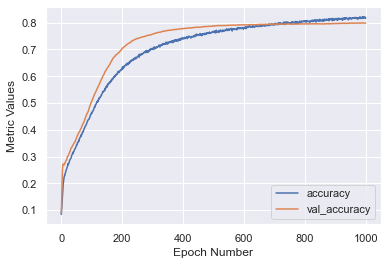

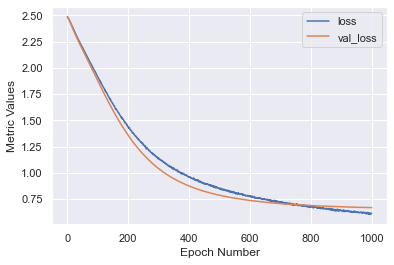

In [10]:
plot_metrics(history, 'accuracy', 'val_accuracy', 'lower right')
plot_metrics(history, 'loss', 'val_loss')

**Run trained model on test set and plot Confusion matrix**

Test Accuracy 0.8034047226798462


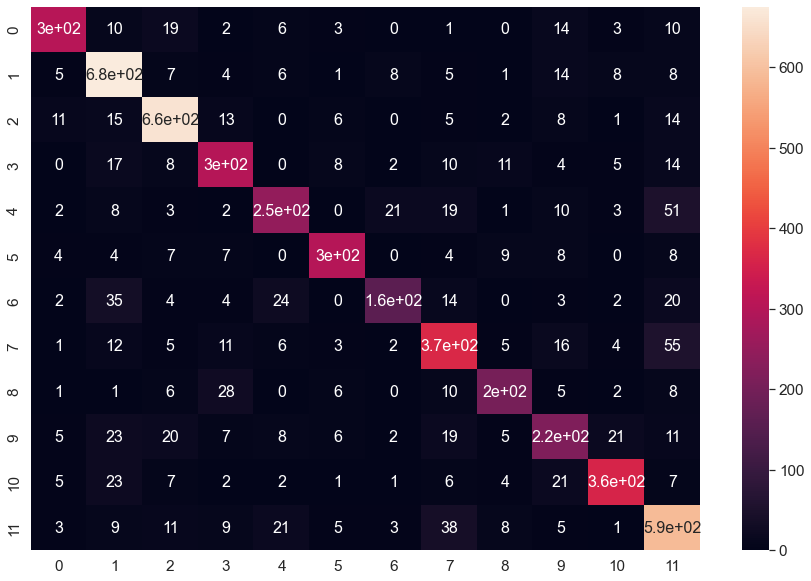

In [11]:
pred = model_mlp(final_test_vector, training=False)
pred_ = tf.math.argmax(pred, axis=1)
conf_matrix = tf.math.confusion_matrix(test_labels, pred_)

test_acc = accuracy_score(test_labels, pred_)
print('Test Accuracy {}'.format(test_acc))

plot_conf_matrix(conf_matrix)

**Label Mapping**

In [12]:
label_mapping = pd.DataFrame(LABEL_MAPPING.items())
label_mapping.reset_index(drop=True, inplace=True)
label_mapping

,0,1
0,Education & Training,0
1,Information & Communication Technology,1
2,Healthcare & Medical,2
3,Sales,3
4,Construction,4
5,Hospitality & Tourism,5
6,Engineering,6
7,"Manufacturing, Transport & Logistics",7
8,Retail & Consumer Products,8
9,Administration & Office Support,9


## Training and Evaluating  Logistic Regression

### Grid Search

In [14]:
#model_lgr = LogisticRegression()
# penalty = ['l1','l2']
# c_values = [100, 10, 1.0, 0.1]
# grid = dict(penalty=penalty,C=c_values)

# grid_search = GridSearchCV(estimator=model_lgr, 
#                            param_grid=grid, 
#                            n_jobs=-1, 
#                            cv=10, 
#                            scoring='accuracy',
#                            error_score=0
#                           )
# res = grid_search.fit(final_train_vector, train_labels)

# # summarize results
# print('optimal: {} using {}'.format(res.best_score_, res.best_params_))
# params = grid_result.cv_results_['params']

### Fitting and evaluating model

In [17]:
# recreate model with the optimal parameters
model_lgr = LogisticRegression(penalty='l2', C=10)

# fit model on the training dataset
model_lgr.fit(final_train_vector, train_labels)

# test on the test set
model_lgr.score(final_test_vector, test_labels)

0.7671609006040637